In [1]:
#import gizmo_analysis as gizmo
#import utilities as ut

import pynbody

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.stats as ss

import pandas as pd
import numpy as np 

import glob

In [2]:
#datapath = '/home/jmwick/H1-merian/fire/csvs'
datapath = '/home/jw1624/H1-merian/fire/csvs'

In [3]:
matplotlib.rc('font', family='serif')
rcParams['axes.linewidth'] = 3
rcParams['xtick.major.width'] = 3
rcParams['xtick.major.size'] = 12
rcParams['ytick.major.width'] = 3
rcParams['ytick.major.size'] = 12

rcParams['xtick.minor.width'] = 2
rcParams['xtick.minor.size'] = 8
rcParams['ytick.minor.width'] = 2
rcParams['ytick.minor.size'] = 8

rcParams['font.family'] = 'serif'

rcParams['text.usetex'] = False

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.transparent'] = False

In [4]:
currentGals = glob.glob(datapath+'/*.txt')
currentGals.sort()
currentGals

['/home/jw1624/H1-merian/fire/csvs/m11b_r2100.txt',
 '/home/jw1624/H1-merian/fire/csvs/m11d_r7100.txt',
 '/home/jw1624/H1-merian/fire/csvs/m11e_r7100.txt',
 '/home/jw1624/H1-merian/fire/csvs/m11h_r7100.txt',
 '/home/jw1624/H1-merian/fire/csvs/m11i_r7100.txt',
 '/home/jw1624/H1-merian/fire/csvs/m11q_r880.txt']

In [5]:
galnames = ['m11b', 'm11d', 'm11e', 'm11h', 'm11i', 'm11q']

In [6]:
pd.read_csv(currentGals[1]).head()

,galaxyID,tstep,t,tlookback,z,M_star,R_halfmass,sigma_allstars_global,sigma_allstars_los,sigma_youngstar_global,sigma_youngstar_los,SFR_10,SFR_100,sSFR_10,sSFR_100
0,m11d_r7100,600,13.736216,0.000000,0.000000,5.127465e+09,12.207031,28.797340,19.480531,19.798386,13.669773,351780.90,3835373.8,-11.163630,-11.126095
1,m11d_r7100,599,13.733927,0.002289,0.000159,5.127543e+09,12.207031,28.836039,19.446818,19.562225,14.280591,292323.53,3975546.0,-11.244046,-11.110513
2,m11d_r7100,598,13.731635,0.004581,0.000319,5.127636e+09,12.207031,28.878078,19.159080,23.437183,15.408602,142761.89,4105139.5,-11.555305,-11.096589
3,m11d_r7100,597,13.729347,0.006869,0.000478,5.127771e+09,12.207031,28.924398,18.721155,21.708794,14.545428,133828.05,4394033.0,-11.583381,-11.067065
4,m11d_r7100,596,13.727057,0.009159,0.000637,5.128113e+09,12.207031,28.975529,19.373775,17.936567,13.925438,206243.89,4570700.5,-11.395576,-11.049975


In [7]:
# Note: m11b has NaN sigma youngstar; also only have a few timesteps so thats kinda fine to exclude it

## 3 Panel

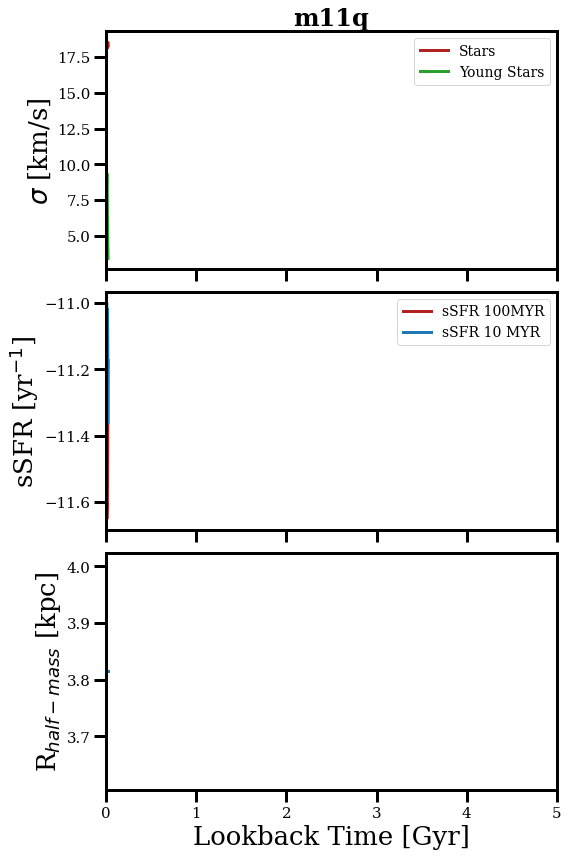

In [20]:
idx=5
gal = currentGals[idx]
tlim = 5

data = pd.read_csv(gal)

fig, axs = plt.subplots(3,1, facecolor='w', figsize=(8,12), sharex=True)

axs[0].set_title(galnames[idx], fontsize=24, weight='bold')

# get lookback time 
tlookback = data['tlookback']

tmask = tlookback<tlim

# top panel: sigma
sigAS = data['sigma_allstars_los'][tmask]
sigYS = data['sigma_youngstar_los'][tmask]

axs[0].plot(tlookback[tmask], sigAS,linewidth=3, color='firebrick')
axs[0].plot(tlookback[tmask], sigYS,linewidth=3, color='tab:green')
#axs[0].plot(tlookback[tmask], sigCGw,linewidth=3, color='tab:blue')

axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].set_ylabel(r'$\sigma$ [km/s]', fontsize=26)
axs[0].legend(['Stars', 'Young Stars', 'Cold Gas'], fontsize=14, loc=1)
axs[0].set_xlim([0,tlim])

# middle panel: sSFR
ssfr10 = data['sSFR_10'][tmask]
ssfr100= data['sSFR_100'][tmask]

l1=axs[1].plot(tlookback[tmask], ssfr100, color='firebrick', linewidth=3)
l2=axs[1].plot(tlookback[tmask], ssfr10, color='tab:blue', linewidth=3)

axs[1].tick_params(axis='both', which='major', labelsize=15)    
axs[1].set_ylabel(r'sSFR [yr$^{-1}$]', fontsize=26)

# adding alpha to middle panel 
#axalpha = axs[1].twinx() 
#l3=axalpha.plot(tlookback[tmask], data['alpha'][tmask], c='k')

#axalpha.tick_params(axis='both', which='major', labelsize=15)
#axalpha.set_ylabel(r'$\alpha$', fontsize=26)
#axalpha.set_ylim([0,-1])

axs[1].legend(['sSFR 100MYR', 'sSFR 10 MYR'], fontsize=14, loc=1)

# Bottom panel: half-mass radius
Rhm = data['R_halfmass'][tmask]

axs[2].plot(tlookback[tmask], Rhm, linewidth=3)
#axs[2].plot(tlookback[tmask], Rhls, linewidth=1, marker='^')
#axs[2].plot(tlookback[tmask], Rhlc, linewidth=1, marker='^')

axs[2].tick_params(axis='both', which='major', labelsize=15)
axs[2].set_ylabel(r'R$_{half-mass}$ [kpc]', fontsize=26)
axs[2].set_xlabel('Lookback Time [Gyr]', fontsize=26)

##
#axs[0].set_ylim(top=35)
#axs[1].set_ylim(top=-7.8)
#axs[2].set_ylim(top=17)

plt.tight_layout()

plt.savefig('../figures/breathingModes/fire/threePanel/'+galnames[idx]+'.png')

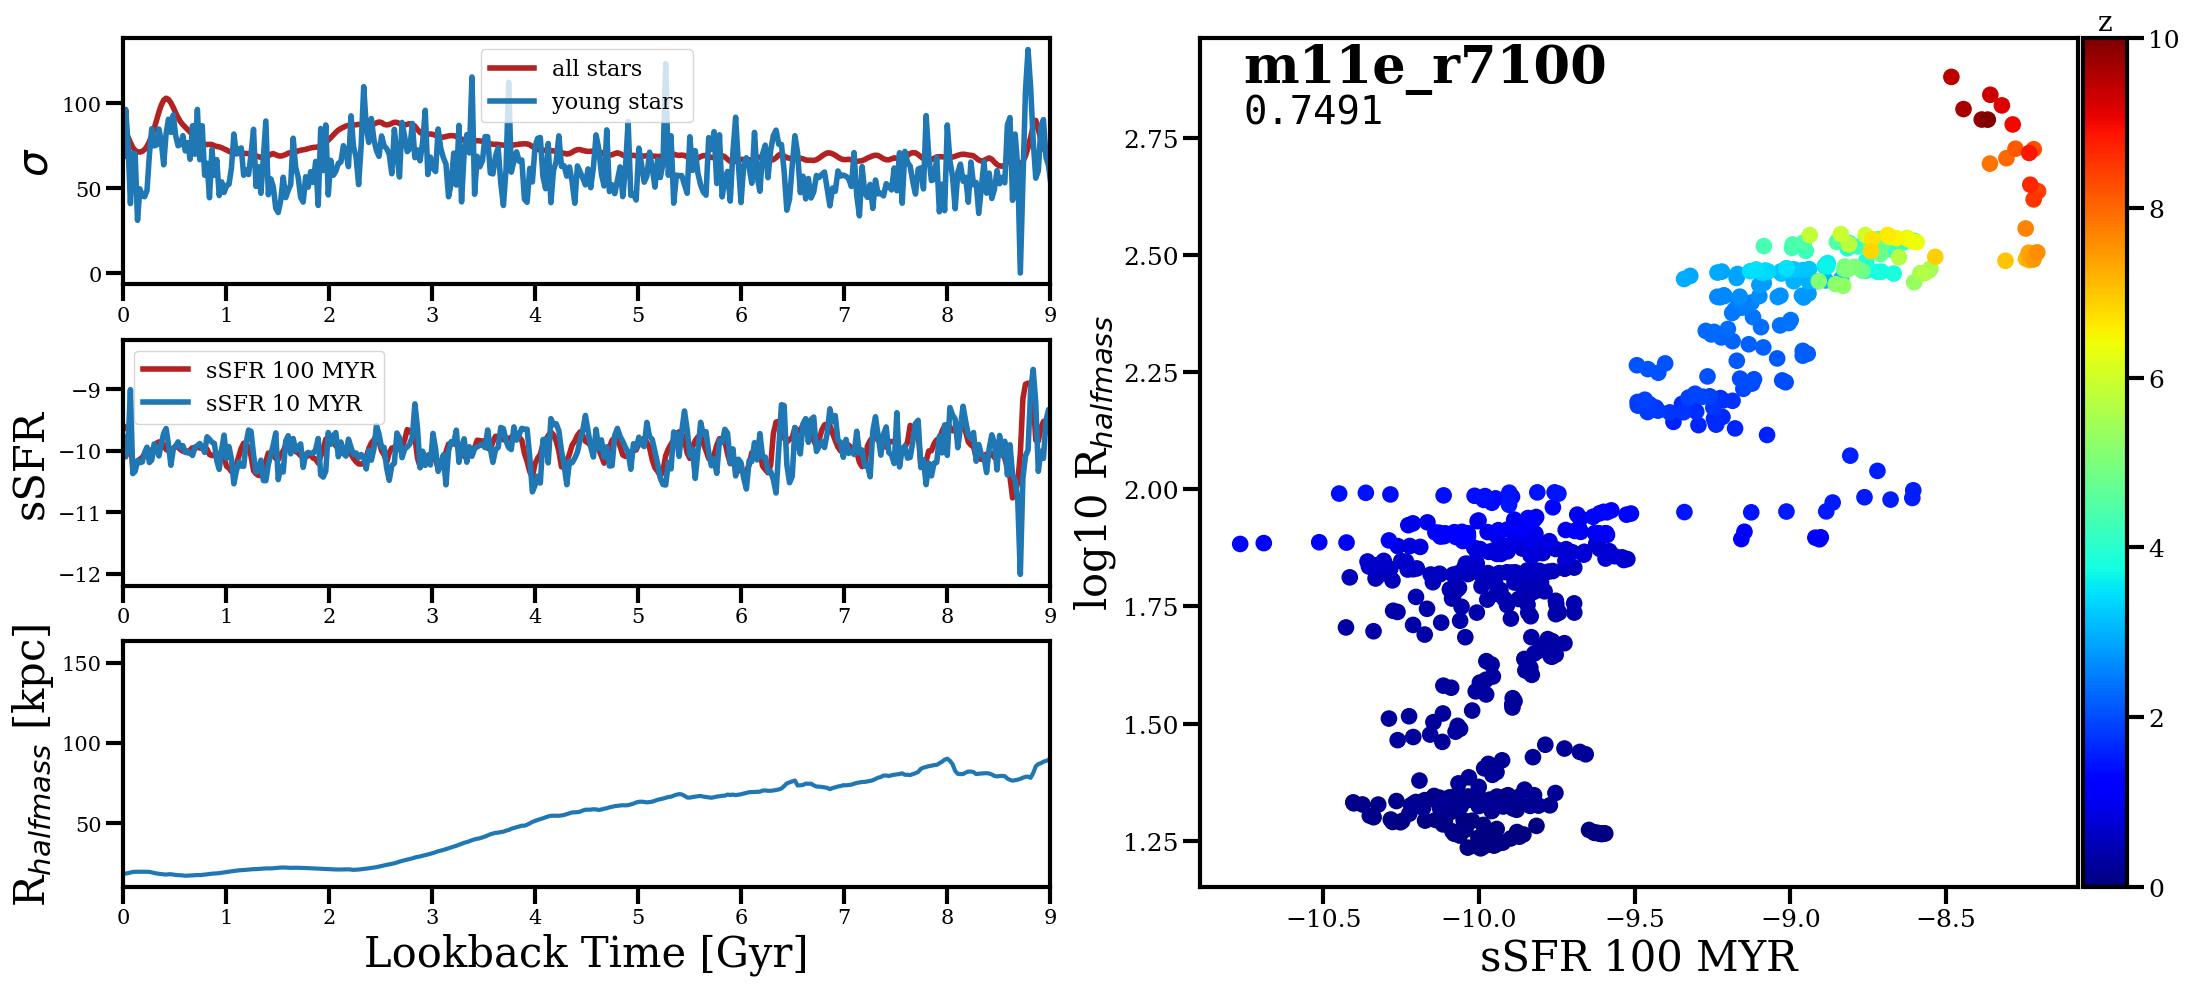

In [61]:
gal = currentGals[2]
zmax = 10
ymin = -1

tlim = 9

data = pd.read_csv(gal)
tlookback = data['tlookback']
mask = tlookback<tlim

# set up fig
fig = plt.figure(facecolor='w', figsize=(22,10))

ax3 = fig.add_subplot(3,2,5)
ax2 = fig.add_subplot(3,2,3, sharex=ax3)
ax1 = fig.add_subplot(3,2,1, sharex=ax3)

axscatter = fig.add_subplot(1,2,2)

ax1.tick_params(axis='y', which='major', labelsize=18)
ax2.tick_params(axis='y', which='major', labelsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)

ax1.tick_params(axis='x', which='major', labelsize=0)    
ax2.tick_params(axis='x', which='major', labelsize=0)

axscatter.tick_params(axis='both', which='major', labelsize=18)

## Line plots 
# top panel: sigma
sigStar = data['sigma_star'][tlookback<tlim+1]
sigYoungStar = data['sigma_youngstar'][tlookback<tlim+1]

ax1.plot(tlookback[tlookback<tlim+1], sigStar, linewidth=4, color='firebrick')
ax1.plot(tlookback[tlookback<tlim+1], sigYoungStar, linewidth=4, color='tab:blue')

ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_ylabel(r'$\sigma$', fontsize=30)

ax1.legend(['all stars', 'young stars'], fontsize=16)

ax1.set_xlim([0,tlim])
#ax1.set_ylim([0,80])

# middle panel: sSFR
ssfr10 = data['sSFR_10'][tlookback<tlim+1]
ssfr100= data['sSFR_100'][tlookback<tlim+1]

ax2.plot(tlookback[tlookback<tlim+1], ssfr100, color='firebrick', linewidth=4)
ax2.plot(tlookback[tlookback<tlim+1], ssfr10, color='tab:blue', linewidth=4)

ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel('sSFR', fontsize=30)

ax2.legend(['sSFR 100 MYR', 'sSFR 10 MYR'], fontsize=16)

#ax2.set_ylim(top=-9)

# Bottom panel: half-light radius
Rhl = data['R_halfmass'][tlookback<tlim+1]

ax3.plot(tlookback[tlookback<tlim+1], Rhl, linewidth=3)

#axs[2].set_ylim([0,5])
ax3.tick_params(axis='both', which='major', labelsize=15)

ax3.set_ylabel(r'R$_{halfmass}$ [kpc]', fontsize=30)

ax3.set_xlabel('Lookback Time [Gyr]', fontsize=30)

## scatter
x = data['sSFR_100'][data['z'] <= zmax]
y = np.log10(data['R_halfmass'][data['z'] <= zmax])
c = data['z'][data['z'] <= zmax]

c = c[y > ymin]
x = x[y > ymin]
y = y[y > ymin]

rs = ss.spearmanr(x,y)[0]

sc = axscatter.scatter(x, y, c=c, cmap='jet', s=120)

axscatter.set_xlabel('sSFR 100 MYR', fontsize=30)
axscatter.set_ylabel(r'log10 R$_{halfmass}$', fontsize=30)

axscatter.text(s=str(gal[-14:-4]), x=min(x[x>-20]+0.01), y=max(y)-0.01, fontsize=38, weight='bold')
axscatter.text(s=str(rs)[:6], x=min(x[x>-20]+0.01), y=max(y)-0.1, fontsize=28, fontfamily='monospace')

#plt.ylim([3,4.5])
#plt.xlim([0.0,0.4])

divider = make_axes_locatable(axscatter)
clb = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc, cax=clb, orientation='vertical')

clb.set_title('z', fontsize=20)
clb.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()

#plt.savefig('../fire/figures/breathingScatterLines/'+str(gal[-14:-4])+'.png')

# Group Figures

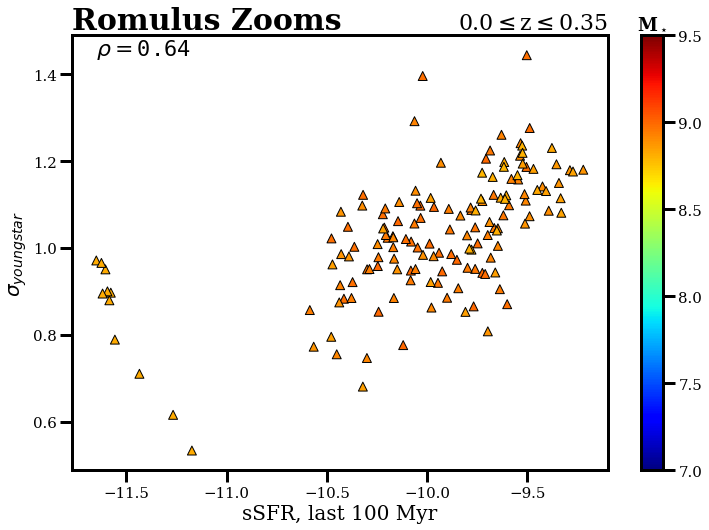

In [32]:
zmin = 0.00
zmax = 0.35

mmin = 8.75
mmax = 9.0
fig = plt.figure(facecolor='w', figsize=(12,8))

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=13)

# get data
sigGas = []
ssfr = []
mall = []
for idx,gal in enumerate(currentGals[1:]):
    data = pd.read_csv(gal)

    x = data['sSFR_100'][data['z'] <= zmax].to_numpy()
    y = np.log10(data['sigma_youngstar_los'][data['z'] <= zmax].to_numpy())
    c = np.log10(data['M_star'][data['z'] <= zmax].to_numpy())
    z = data['z'][data['z']<= zmax].to_numpy()
    
    x = x[z>=zmin]
    y = y[z>=zmin]
    c = c[z>=zmin]
    
    x = x[c>=mmin]
    y = y[c>=mmin]
    c = c[c>=mmin]
    
    x = x[c<=mmax]
    y = y[c<=mmax]
    c = c[c<=mmax]
    
    for i,_ in enumerate(x):
        ssfr.append(x[i])
        sigGas.append(y[i])
        mall.append(c[i])
        
rs = ss.spearmanr(sigGas, ssfr)[0]
        
# scatter 
plt.scatter(ssfr, sigGas, c=mall, cmap='jet', s=80, ec='k', marker='^', vmin=7.0, vmax=9.5)

plt.xlabel('sSFR, last 100 Myr', fontsize=20)
plt.ylabel(r'$\sigma_{youngstar}$', fontsize=20)

clb = plt.colorbar()
clb.ax.set_title(r'M$_\star$', fontsize=18, weight='bold')
clb.ax.tick_params(labelsize=15)

plt.title('FIRE Zooms', fontsize=30, weight='bold', loc='left')
plt.title(str(zmin)+r'$\leq$z$\leq$'+str(zmax), fontsize=22, loc='right')

plt.text(x=min(ssfr), y=max(sigGas), s=r'$\rho=$'+str(rs)[:4], fontsize=22, fontfamily='monospace')

ff = '../figures/breathingModes/ssfr100_SigYS_group/'+str(zmin)[:3]+'z'+str(zmax)[:3]+'.png'
#plt.savefig(ff)

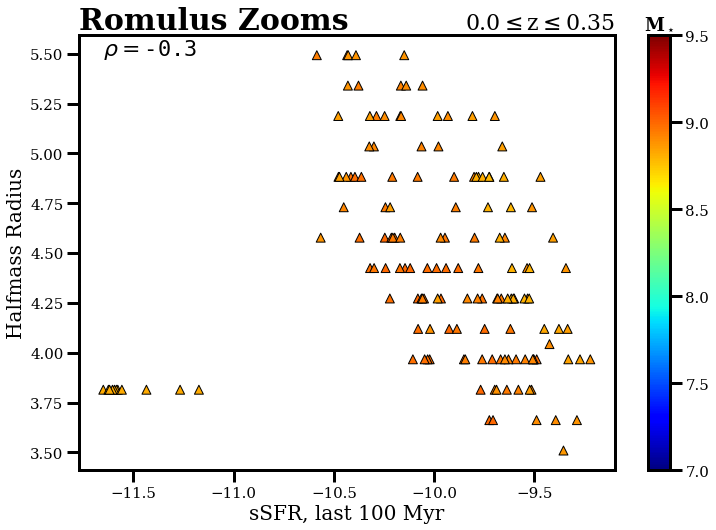

In [37]:
zmin = 0.0
zmax = 0.35

mmin = 8.5
mmax = 9.0
fig = plt.figure(facecolor='w', figsize=(12,8))

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=13)

# get data
ssfr = []
rhm = []
mall = []
for idx,gal in enumerate(currentGals[1:]):
    data = pd.read_csv(gal)

    x = data['sSFR_100'][data['z'] <= zmax].to_numpy()
    y = data['R_halfmass'][data['z'] <= zmax].to_numpy()
    c = np.log10(data['M_star'][data['z'] <= zmax].to_numpy())
    z = data['z'][data['z']<= zmax].to_numpy()
    
    x = x[z>=zmin]
    y = y[z>=zmin]
    c = c[z>=zmin]
    
    x = x[c>=mmin]
    y = y[c>=mmin]
    c = c[c>=mmin]
    
    x = x[c<=mmax]
    y = y[c<=mmax]
    c = c[c<=mmax]
    
    for i,_ in enumerate(x):
        ssfr.append(x[i])
        rhm.append(y[i])
        mall.append(c[i])
        
rs = ss.spearmanr(ssfr, rhm)[0]
        
# scatter 
plt.scatter(ssfr, rhm, c=mall, cmap='jet', s=80, ec='k', marker='^', vmin=7.0, vmax=9.5)

plt.xlabel('sSFR, last 100 Myr', fontsize=20)
plt.ylabel(r'Halfmass Radius', fontsize=20)

#plt.xscale('log')

clb = plt.colorbar()
clb.ax.set_title(r'M$_\star$', fontsize=18, weight='bold')
clb.ax.tick_params(labelsize=15)

plt.title('FIRE Zooms', fontsize=30, weight='bold', loc='left')
plt.title(str(zmin)+r'$\leq$z$\leq$'+str(zmax), fontsize=22, loc='right')

plt.text(x=min(ssfr), y=max(rhm), s=r'$\rho=$'+str(rs)[:4], fontsize=22, fontfamily='monospace')

ff = '../figures/breathingModes/ssfr100_SigYS_group/'+str(zmin)[:3]+'z'+str(zmax)[:3]+'.png'
#plt.savefig(ff)

# with Mass Binning

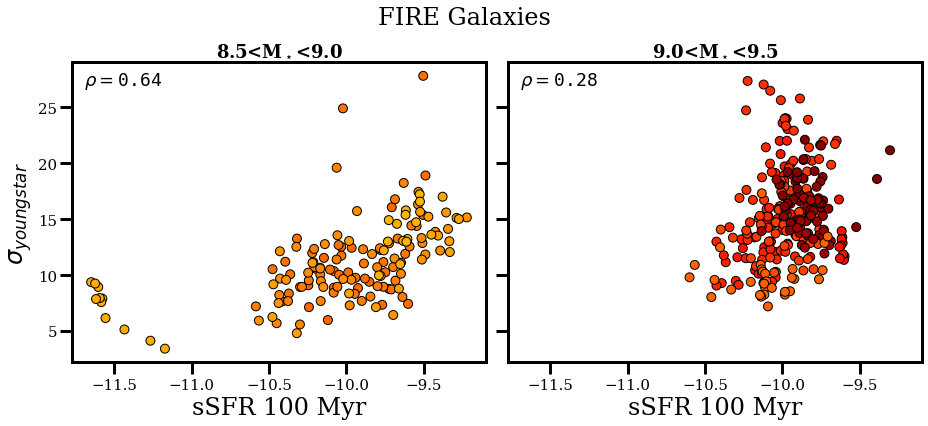

In [54]:
# SIG
fig, axs = plt.subplots(1,2, figsize=(13,6), facecolor='w', sharex=True, sharey=True)

zmin = 0.00
zmax = 0.35

#mbins = [7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
mbins = [8.5,9.0,9.5]

for i,ax in enumerate(axs):
    ssfr = []
    sigYS = []
    mall = []
    
    mstar_min = mbins[i]
    mstar_max = mbins[i+1]
    for idx,gal in enumerate(currentGals[1:]):
        
        data = pd.read_csv(gal)
        
        massmask = np.log10(np.array(data['M_star']))>= mstar_min
        mm = np.log10(np.array(data['M_star']))[massmask]
        x = np.array(data['sSFR_100'])[massmask]
        y = np.array(data['sigma_youngstar_los'])[massmask]
        z = np.array(data['z'])[massmask]

        massmask = mm<=mstar_max
        mm = mm[massmask]
        x = x[massmask]
        y = y[massmask]
        z = z[massmask]

        zmask = z>=zmin
        mm = mm[zmask]
        x = x[zmask]
        y = y[zmask]
        z = z[zmask]
        
        zmask = z<=zmax
        mm = mm[zmask]
        x = x[zmask]
        y = y[zmask]
        z = z[zmask]
        
        for j,_ in enumerate(x):
            ssfr.append(x[j])
            sigYS.append(y[j])
            mall.append(mm[j])
        
    ax.scatter(ssfr, sigYS, c=mall, cmap='jet', s=80, ec='k', vmin=7,vmax=9.5)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=13)

    p = ss.spearmanr(ssfr, sigYS)[0]
    ax.text(s=r'$\rho = $'+str(p)[:4], x=-11.7, y=27, fontsize=18, fontfamily='monospace')
    
    ax.set_title(str(mstar_min)+'<M$_\star$<'+str(mstar_max), fontsize=18, weight='bold')
    
# colorbar
#cax = make_axes_locatable(axs[-1]).append_axes('right', size='5%', pad=0.05)
#fig.colorbar(s, cax=cax, orientation='vertical')
#cax.set_title(r'M$_\star$', fontsize=12, weight='bold')
#cax.tick_params(axis='both', which='major', labelsize=12)
    
# prettify 
axs[0].set_xlabel('sSFR 100 Myr', fontsize=24)
axs[1].set_xlabel('sSFR 100 Myr', fontsize=24)
axs[0].set_ylabel(r'$\sigma_{youngstar}$', fontsize=24)

plt.suptitle('FIRE Galaxies', fontsize=24)

plt.tight_layout()

pf = '../figures/breathingModes/fire/ssfr_100_hmr_binned_2.png'
plt.savefig(pf)